#                                               **DEEP LEARNING PROJECT-2**


---







*   **NAVEEN BALARAJU**(UB:50251459)
*   **AVINASH KAMMARDI SASHIPRAKASH**(UB:50292823)





# **TESTING AND COMPARING UNET, MULTIRES UNET AND PROPOSED UNET MODELS**

# DEPENDENT PACKAGES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2
from keras.optimizers import Adam
import pickle
import os
from keras.optimizers import Adam
from keras import backend as K
from keras.models import load_model
from sklearn.model_selection import train_test_split

# MOUNTING TO DRIVE

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# HYPERPARAMETERS AND LOSS FUNCTION

In [0]:
imagesize = 256
batch_size = 32
Optimizer = Adam(lr=1e-5)

smooth = 1.0
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

# LOADING DATA

In [4]:
pkl_img = open('Image.pickle','rb')
Final_image_data = pickle.load(pkl_img)

pkl_img = open('Mask.pickle','rb')
Final_mask_data = pickle.load(pkl_img)

print(f'Shape of training images: {Final_image_data.shape}')
print(f'Shape of training mask: {Final_mask_data.shape}')



# Normalizing the Data

Final_image_data = Final_image_data/255.0
Final_mask_data = Final_mask_data/255.0

# Splitting The dataset

Training_images,Validation_images,Training_mask,Validation_masks = train_test_split(Final_image_data,Final_mask_data,test_size=0.15,random_state=42)
del(Final_image_data)
del(Final_mask_data)
Validation_images,Test_images,Validation_masks,Test_masks = train_test_split(Validation_images,Validation_masks,test_size=0.15,random_state=42)


print(f'Training Images shape:{Training_images.shape}')
print(f'Training Mask shape:{Training_mask.shape}')
print(f'Validation Images shape:{Validation_images.shape}')
print(f'Validation Mask shape:{Validation_masks.shape}')
print(f'Test Images shape:{Test_images.shape}')
print(f'Test Mask shape:{Test_masks.shape}')

Shape of training images: (3929, 256, 256, 1)
Shape of training mask: (3929, 256, 256, 1)
Training Images shape:(3339, 256, 256, 1)
Training Mask shape:(3339, 256, 256, 1)
Validation Images shape:(501, 256, 256, 1)
Validation Mask shape:(501, 256, 256, 1)
Test Images shape:(89, 256, 256, 1)
Test Mask shape:(89, 256, 256, 1)


In [0]:

# Loading the Pickle files for Unet
p = open('train_dice_coef.pickle','rb')
train_dice_coef_unet = pickle.load(p)
train_dice_coef_unet = train_dice_coef_unet[:120]

p = open('train_loss.pickle','rb')
train_loss_unet = pickle.load(p)
train_loss_unet = train_loss_unet[:120]

p = open('validation_dice_coef.pickle','rb')
validation_dice_coef_unet = pickle.load(p)
validation_dice_coef_unet = validation_dice_coef_unet[:120]

p = open('validation_loss.pickle','rb')
validation_loss_unet = pickle.load(p)
validation_loss_unet = validation_loss_unet[:120]

p = open('Number_of_epochs.pickle','rb')
Number_of_epochs = pickle.load(p)
Number_of_epochs = Number_of_epochs[:120]

In [0]:
# Loading the Pickle files for Proposed
p = open('train_dice_coef.pickle','rb')
train_dice_coef_Proposed = pickle.load(p)
train_dice_coef_Proposed = train_dice_coef_Proposed[:120]

p = open('train_loss.pickle','rb')
train_loss_Proposed = pickle.load(p)
train_loss_Proposed = train_loss_Proposed[:120]

p = open('validation_dice_coef.pickle','rb')
validation_dice_coef_Proposed = pickle.load(p)
validation_dice_coef_Proposed = validation_dice_coef_Proposed[:120]

p = open('validation_loss.pickle','rb')
validation_loss_Proposed = pickle.load(p)
validation_loss_Proposed = validation_loss_Proposed[:120]


In [0]:
# Loading the Pickle files for Multires
p = open('train_dice_coef.pickle','rb')
train_dice_coef_Multiresunet = pickle.load(p)
train_dice_coef_Multiresunet = train_dice_coef_Multiresunet[:120]

p = open('train_loss.pickle','rb')
train_loss_Multiresunet = pickle.load(p)
train_loss_Multiresunet = train_loss_Multiresunet[:120]

p = open('validation_dice_coef.pickle','rb')
validation_dice_coef_Multiresunet = pickle.load(p)
validation_dice_coef_Multiresunet = validation_dice_coef_Multiresunet[:120]

p = open('validation_loss.pickle','rb')
validation_loss_Multiresunet = pickle.load(p)
validation_loss_Multiresunet = validation_loss_Multiresunet[:120]

# COMPARING TRAINING DICE SCORE FOR UNET,MULTIRES UNET & PROPOSED UNET

*   For comparing the results between the Unet, MultiRes Unet and Proposed Unet, we have considerd first 120 epochs for which the model was trained.




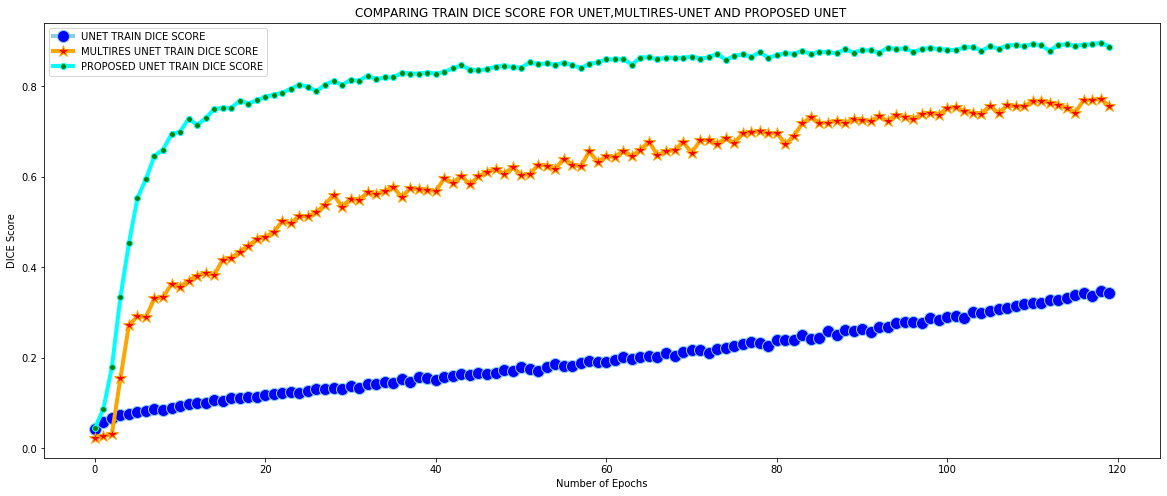

In [0]:
plt.figure(figsize=(20,8))
plt.title('COMPARING TRAIN DICE SCORE FOR UNET,MULTIRES-UNET AND PROPOSED UNET ')
plt.plot(Number_of_epochs,train_dice_coef_unet,marker='o',markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4,label='UNET TRAIN DICE SCORE')
plt.plot(Number_of_epochs,train_dice_coef_Multiresunet,marker='*',markerfacecolor='red',markersize=12,color='orange',linewidth=4,label='MULTIRES UNET TRAIN DICE SCORE')
plt.plot(Number_of_epochs,train_dice_coef_Proposed,marker='.',markerfacecolor='green',markersize=12,color='cyan',linewidth=4,label='PROPOSED UNET TRAIN DICE SCORE')
plt.xlabel('Number of Epochs')
plt.ylabel('DICE Score')
plt.legend()
plt.savefig('TRAIN_Dice_score.png')
plt.show()

# COMPARING VALIDATION DICE SCORE FOR UNET,MULTIRES UNET & PROPOSED UNET

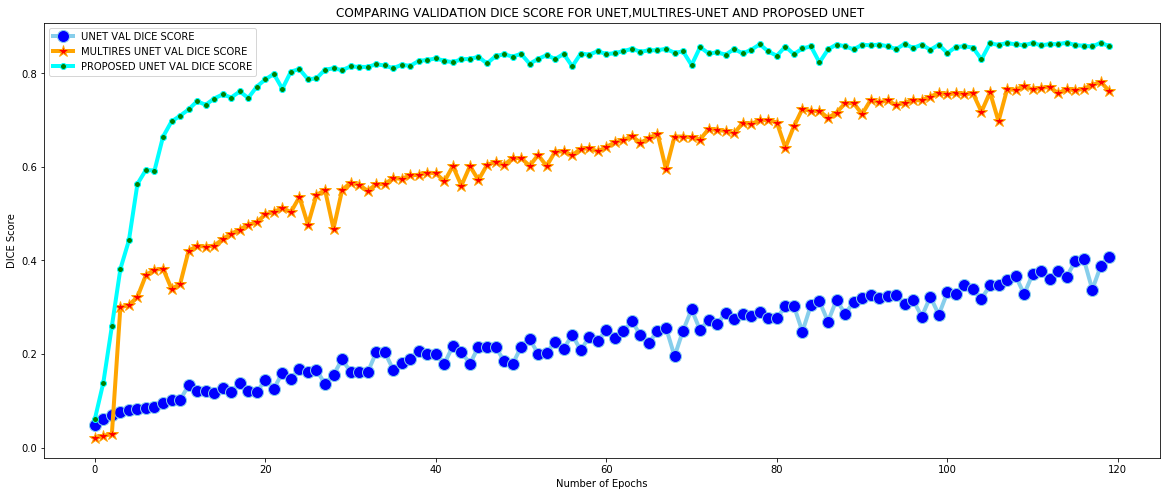

In [0]:
plt.figure(figsize=(20,8))
plt.title('COMPARING VALIDATION DICE SCORE FOR UNET,MULTIRES-UNET AND PROPOSED UNET ')
plt.plot(Number_of_epochs,validation_dice_coef_unet,marker='o',markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4,label='UNET VAL DICE SCORE')
plt.plot(Number_of_epochs,validation_dice_coef_Multiresunet,marker='*',markerfacecolor='red',markersize=12,color='orange',linewidth=4,label='MULTIRES UNET VAL DICE SCORE')
plt.plot(Number_of_epochs,validation_dice_coef_Proposed,marker='.',markerfacecolor='green',markersize=12,color='cyan',linewidth=4,label='PROPOSED UNET VAL DICE SCORE')
plt.xlabel('Number of Epochs')
plt.ylabel('DICE Score')
plt.legend()
plt.savefig('VALIDATION_Dice_score.png')
plt.show()


# COMPARING TRAINING LOSS FOR UNET,MULTIRES UNET & PROPOSED UNET

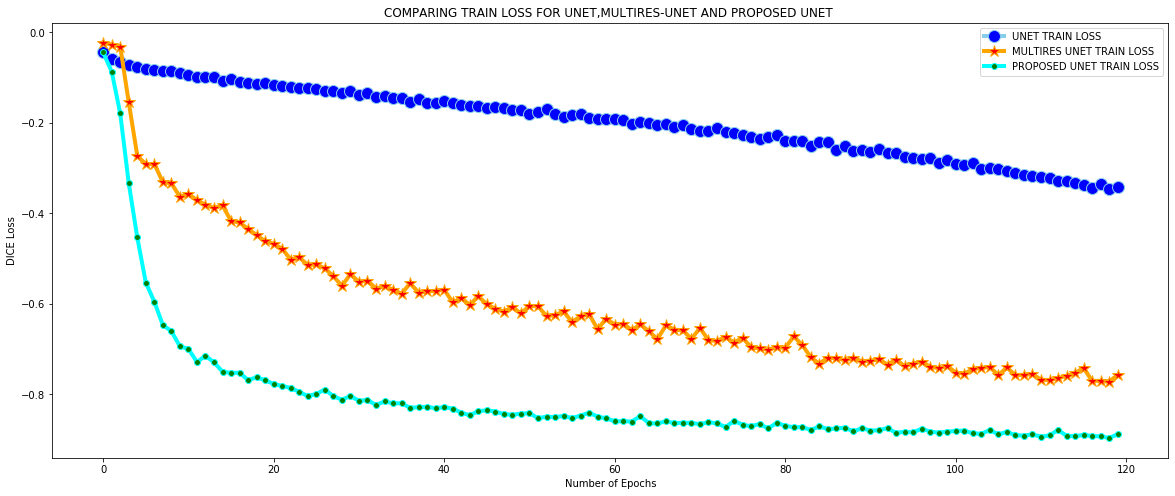

In [0]:
plt.figure(figsize=(20,8))
plt.title('COMPARING TRAIN LOSS FOR UNET,MULTIRES-UNET AND PROPOSED UNET ')
plt.plot(Number_of_epochs,train_loss_unet,marker='o',markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4,label='UNET TRAIN LOSS')
plt.plot(Number_of_epochs,train_loss_Multiresunet,marker='*',markerfacecolor='red',markersize=12,color='orange',linewidth=4,label='MULTIRES UNET TRAIN LOSS')
plt.plot(Number_of_epochs,train_loss_Proposed,marker='.',markerfacecolor='green',markersize=12,color='cyan',linewidth=4,label='PROPOSED UNET TRAIN LOSS')
plt.xlabel('Number of Epochs')
plt.ylabel('DICE Loss')
plt.legend()
plt.savefig('TRAINLOSS.png')
plt.show()

# COMPARING VALIDATION LOSS FOR UNET,MULTIRES UNET & PROPOSED UNET

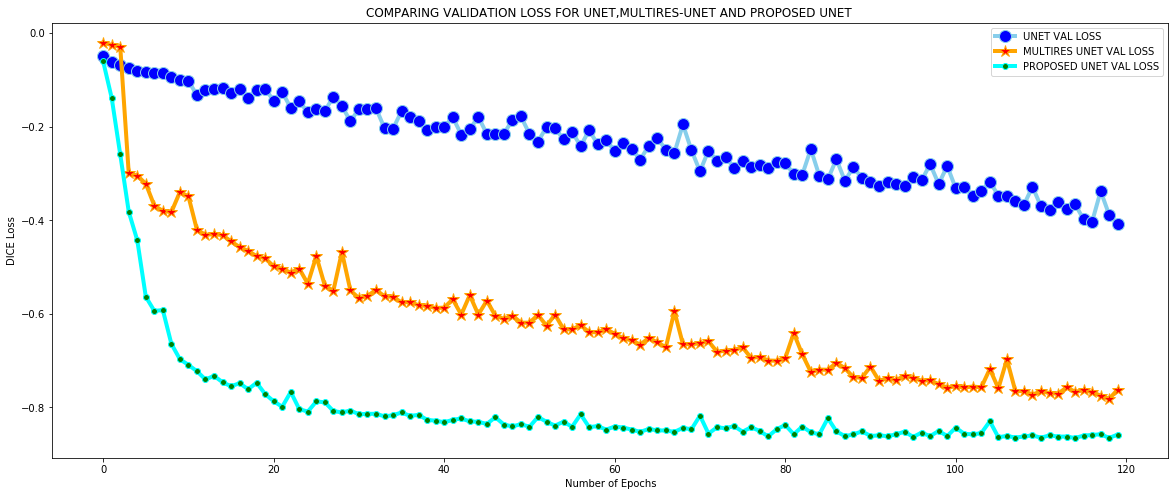

In [0]:
plt.figure(figsize=(20,8))
plt.title('COMPARING VALIDATION LOSS FOR UNET,MULTIRES-UNET AND PROPOSED UNET ')
plt.plot(Number_of_epochs,validation_loss_unet,marker='o',markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4,label='UNET VAL LOSS')
plt.plot(Number_of_epochs,validation_loss_Multiresunet,marker='*',markerfacecolor='red',markersize=12,color='orange',linewidth=4,label='MULTIRES UNET VAL LOSS')
plt.plot(Number_of_epochs,validation_loss_Proposed,marker='.',markerfacecolor='green',markersize=12,color='cyan',linewidth=4,label='PROPOSED UNET VAL LOSS')
plt.xlabel('Number of Epochs')
plt.ylabel('DICE Loss')
plt.legend()
plt.savefig('VALLOSS.png')
plt.show()

# TESTING U-NET MODEL

**TESTING UNET MODEL TRAINED FOR 360 EPOCHS**

In [0]:
saved_unet_model = load_model("Unet_trained_model_with_dataaug_360epoch.h5",custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef':dice_coef})

In [0]:
pred_unet = saved_unet_model.predict(Test_images,verbose=1)

89/89 [==============================] - 4s 41ms/step


In [0]:
saved_unet_model.evaluate(Test_images,Test_masks,verbose=1)

89/89 [==============================] - 4s 41ms/step


[-0.8242110703768355, 0.8242110703768355]

**TESTING UNET MODEL TRAINED FOR 120 EPOCHS**

In [0]:
saved_unet_model_120 = load_model("Unet_model_120epoch.h5",custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef':dice_coef})

In [7]:
pred_unet_120 = saved_unet_model_120.predict(Test_images,verbose=1)

89/89 [==============================] - 6s 69ms/step


In [8]:
saved_unet_model_120.evaluate(Test_images,Test_masks,verbose=1)

89/89 [==============================] - 1s 15ms/step


[-0.3472634167148826, 0.3472634167148826]

# TESTING MULTIRES U-NET MODEL

In [0]:
saved_Multiresunet_model = load_model("Multires_Unet_trained_model_with_dataaug_120epoch.h5",custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef':dice_coef})

In [0]:
pred_multiresunet = saved_Multiresunet_model.predict(Test_images,verbose=1)

89/89 [==============================] - 17s 188ms/step


In [0]:
saved_Multiresunet_model.evaluate(Test_images,Test_masks,verbose=1)

89/89 [==============================] - 3s 32ms/step


[-0.7377269335007399, 0.7377269502436177]

# TESTING PROPOSED U-NET MODEL

In [0]:
saved_proposed_Unet_model = load_model("PropUnet_trained_model_with_dataaug_120epoch.h5",custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef':dice_coef})

In [0]:
pred_proposedunet = saved_proposed_Unet_model.predict(Test_images,verbose=1)

89/89 [==============================] - 4s 43ms/step


In [0]:
 saved_proposed_Unet_model.evaluate(Test_images,Test_masks,verbose=1)

89/89 [==============================] - 4s 45ms/step


[-0.8139622774016991, 0.8139622774016991]

# VISUALIZING THE OUTPUTS GENERATED BY MODELS

*   By analyzing and comparing the segmentation maps given Unet, MultiRes unet and Proposed Unet with the true segmented mask. We conclude that the segmentation maps given by the Proposed model overlaped the most with the true segementation map.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


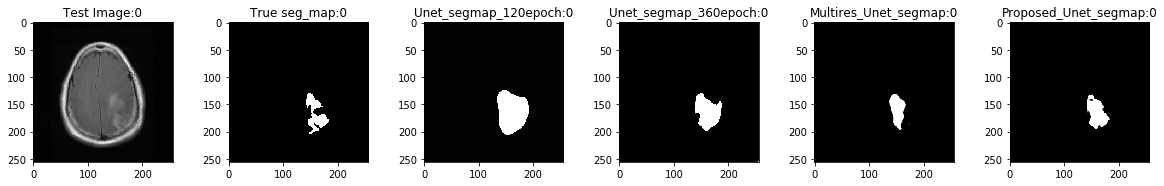

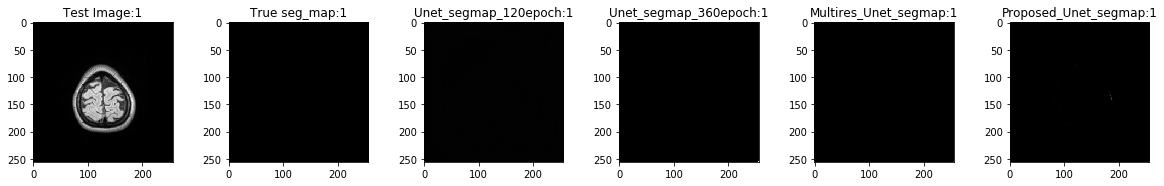

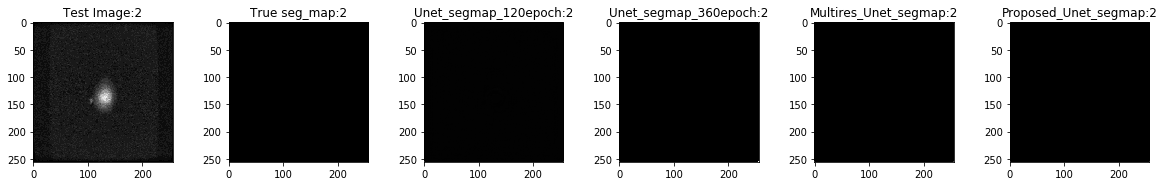

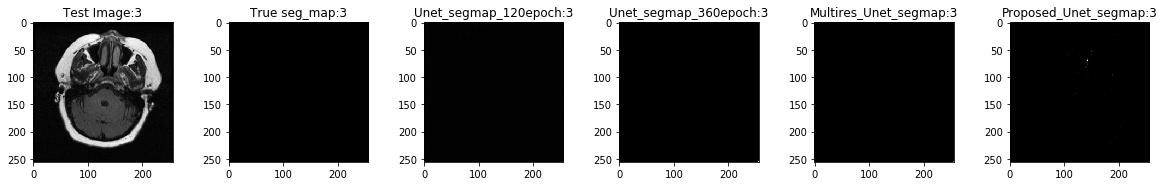

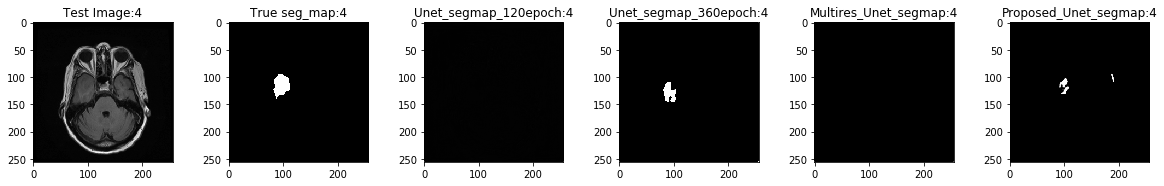

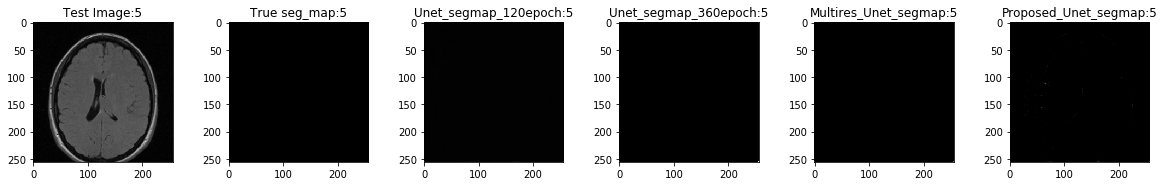

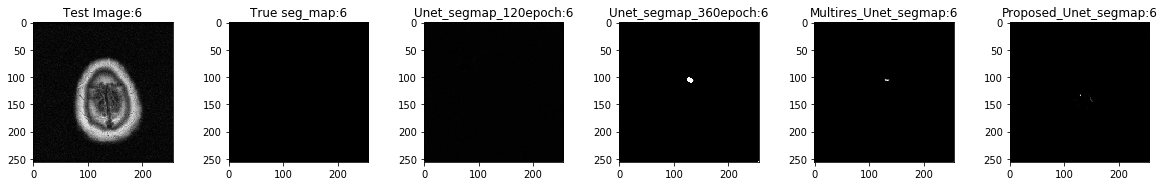

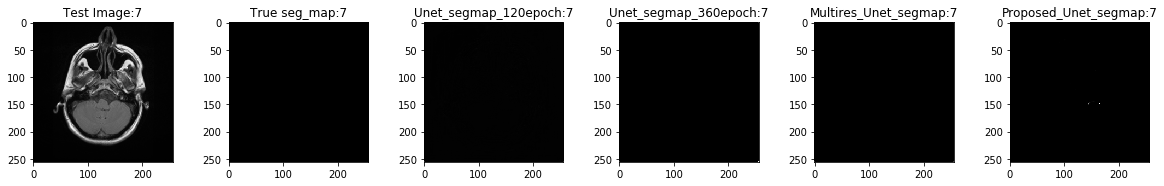

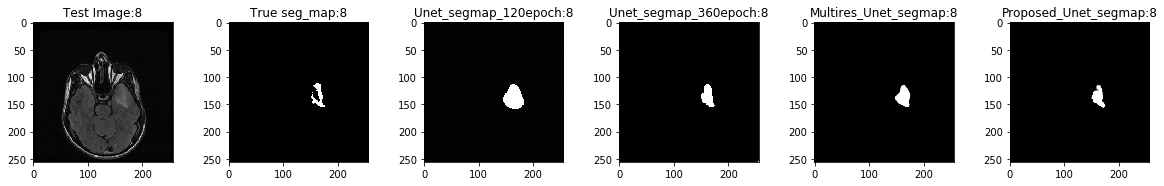

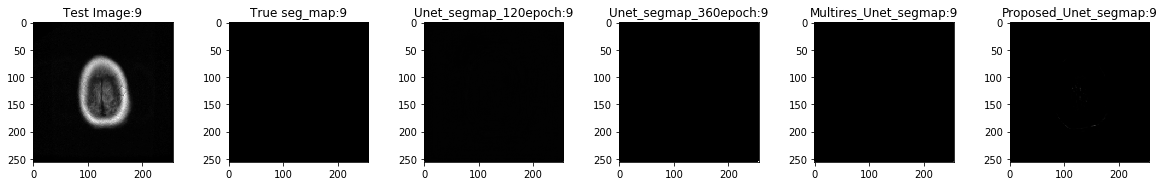

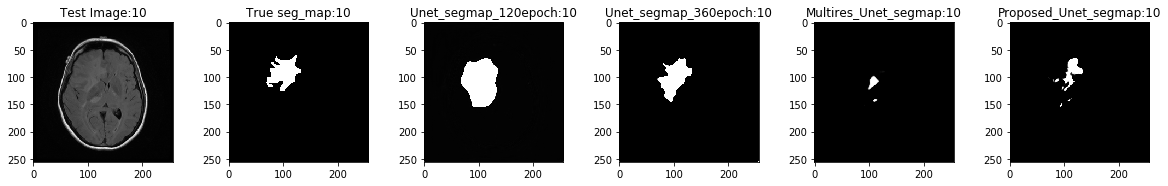

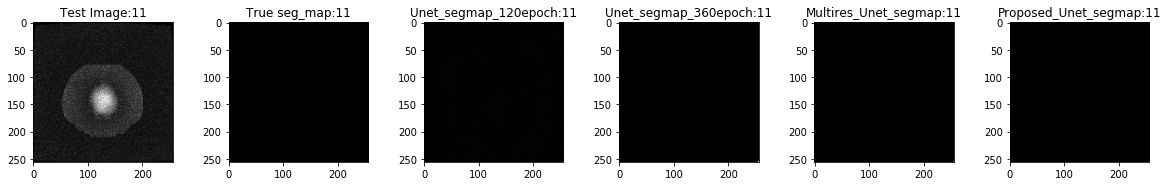

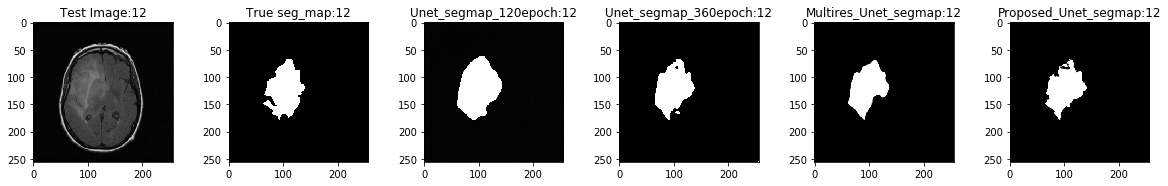

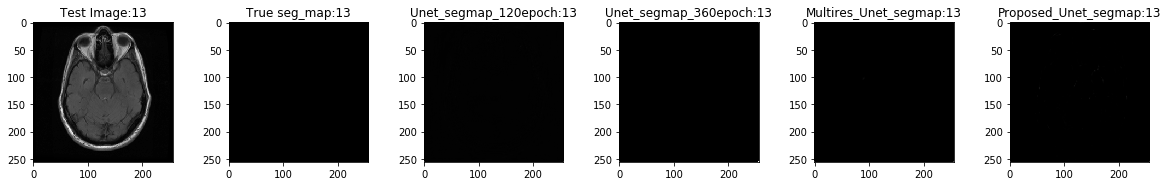

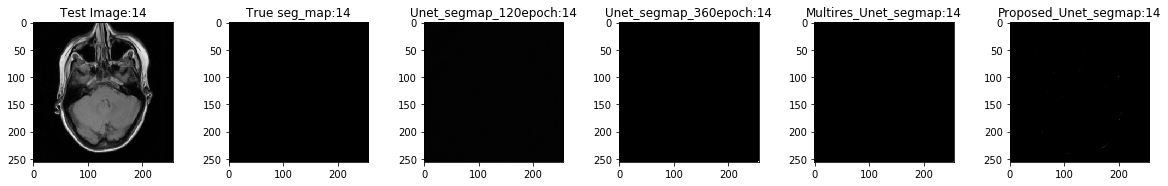

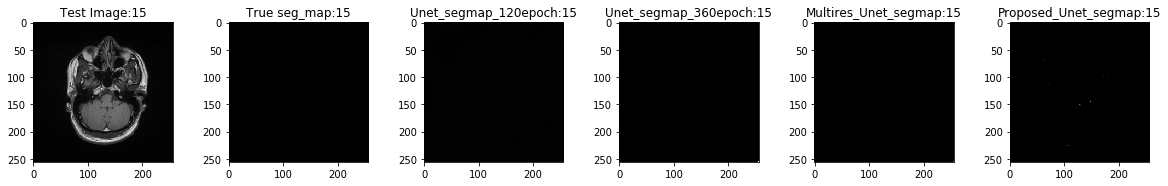

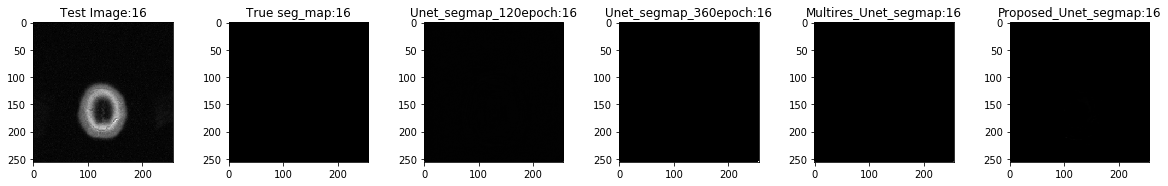

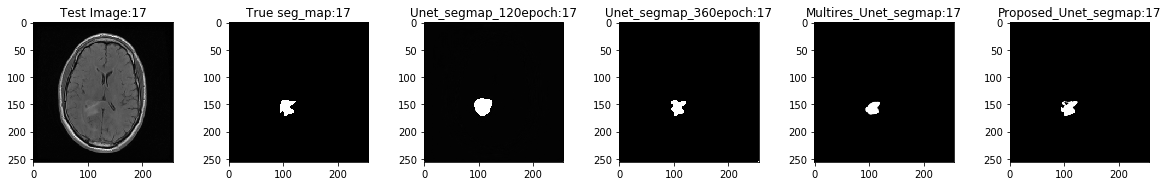

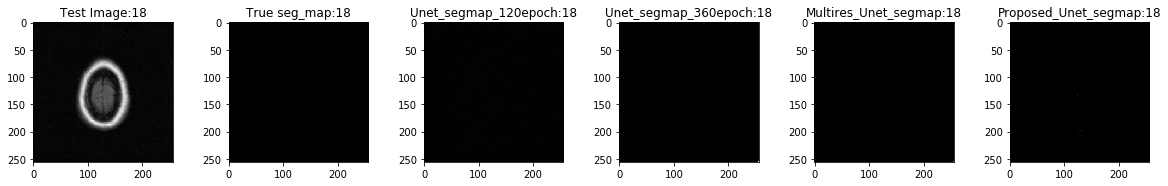

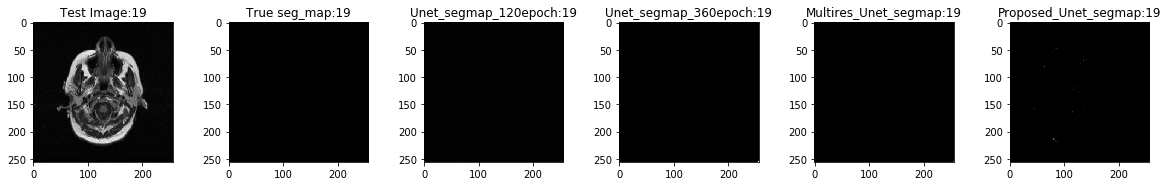

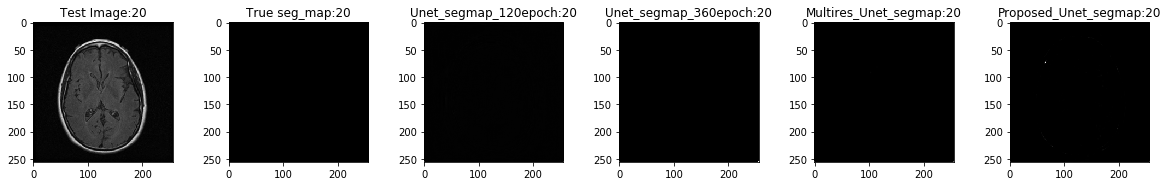

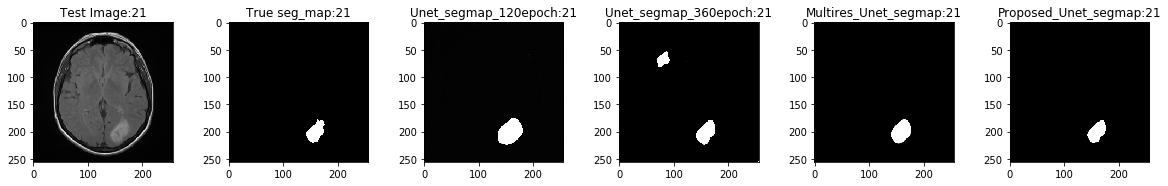

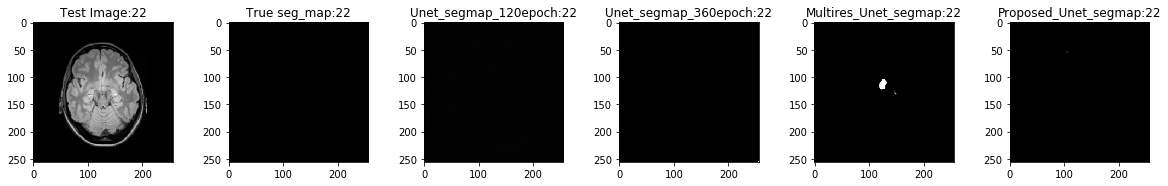

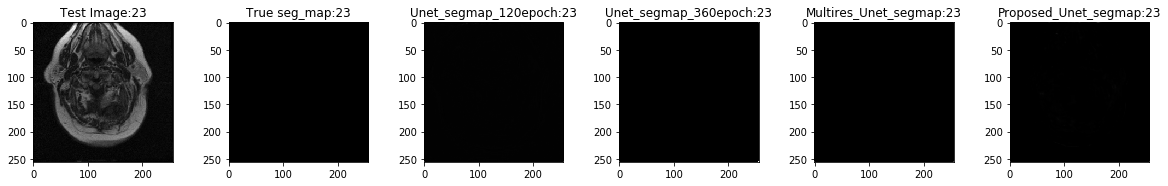

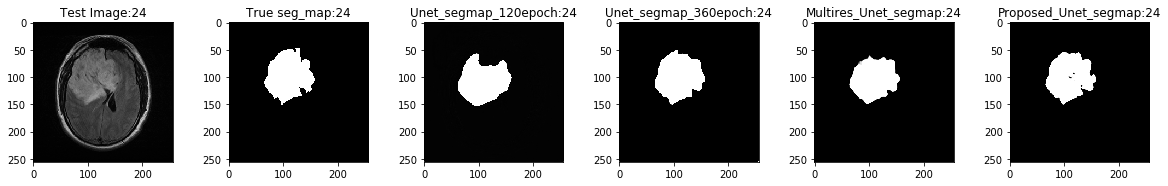

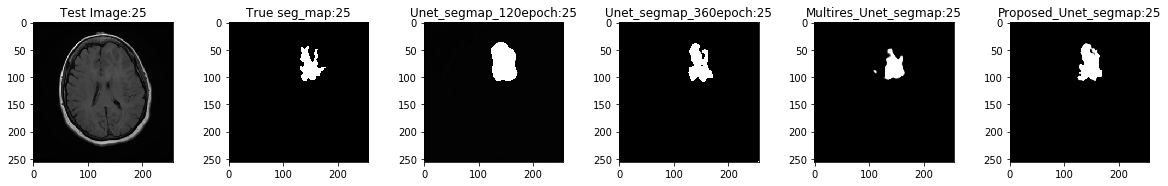

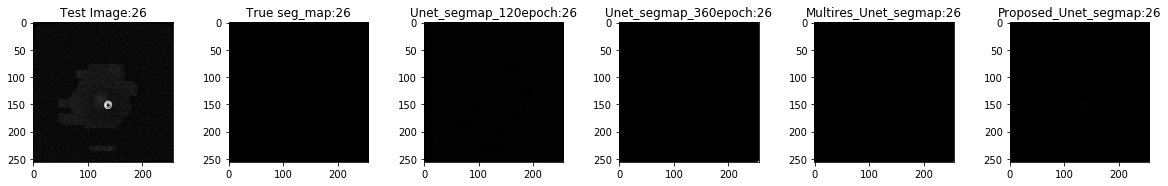

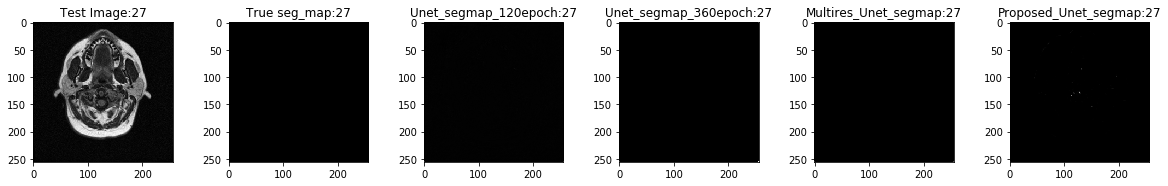

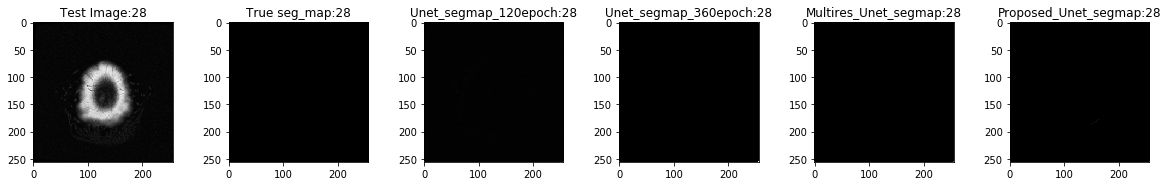

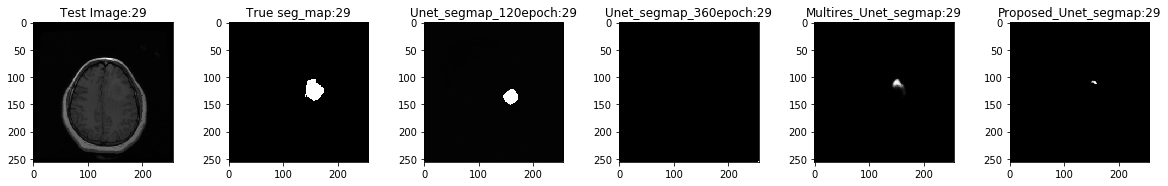

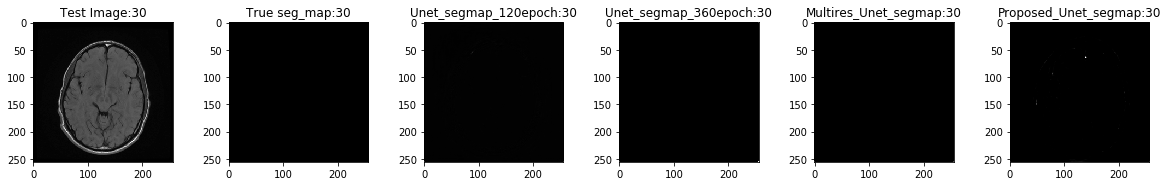

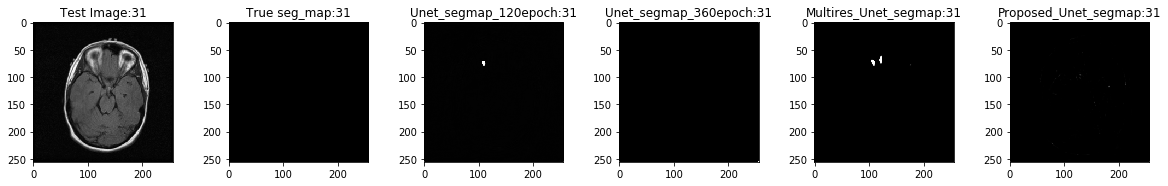

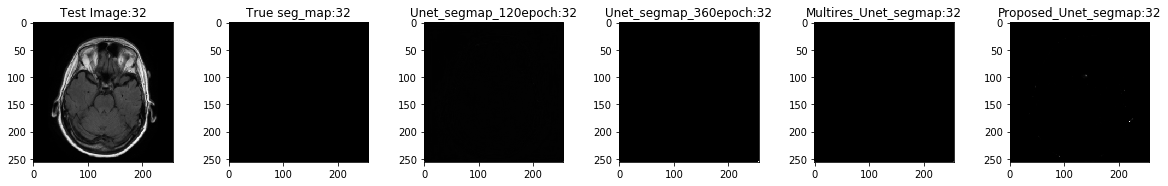

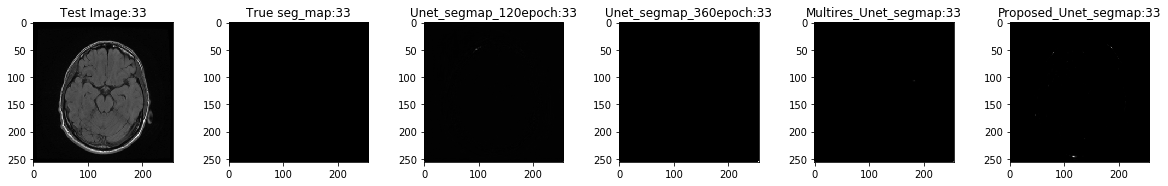

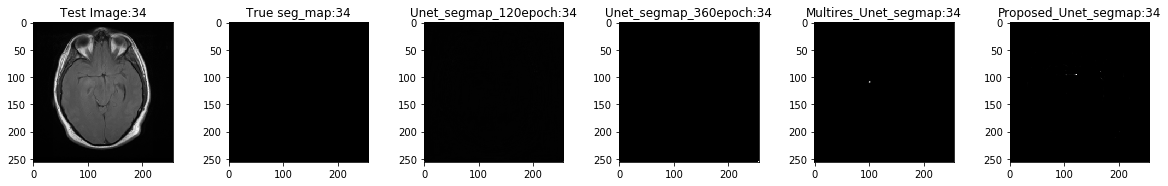

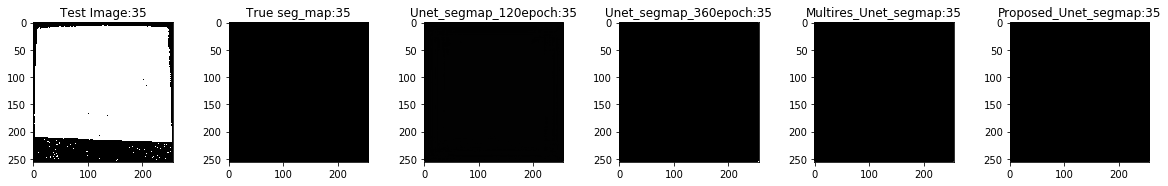

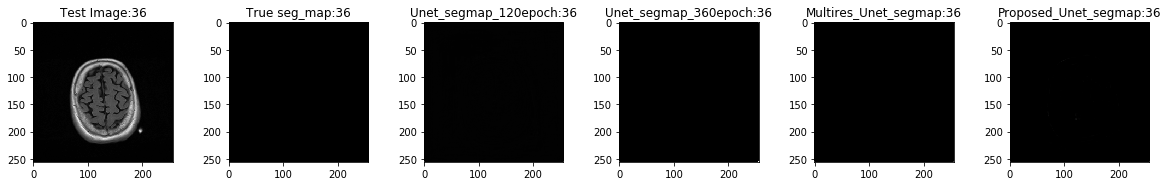

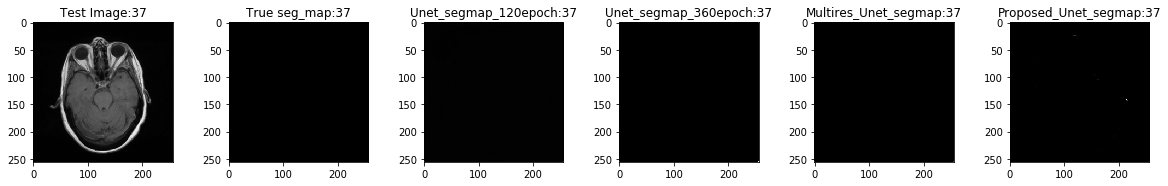

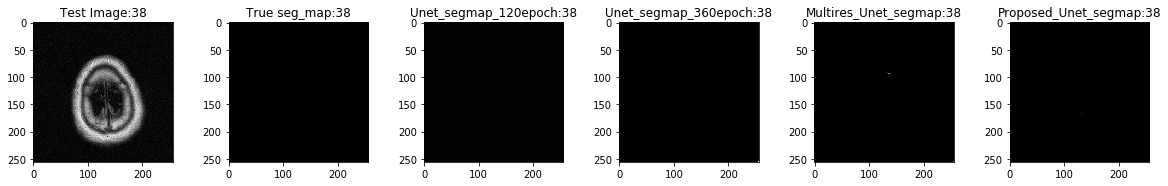

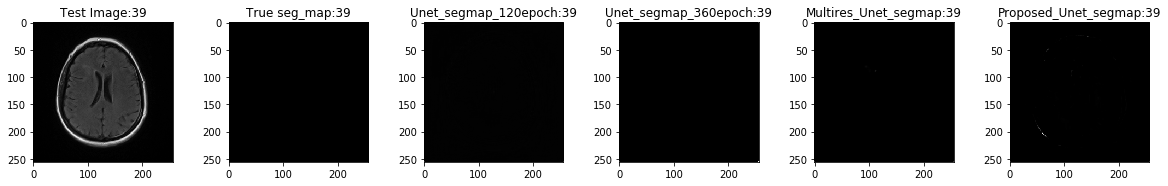

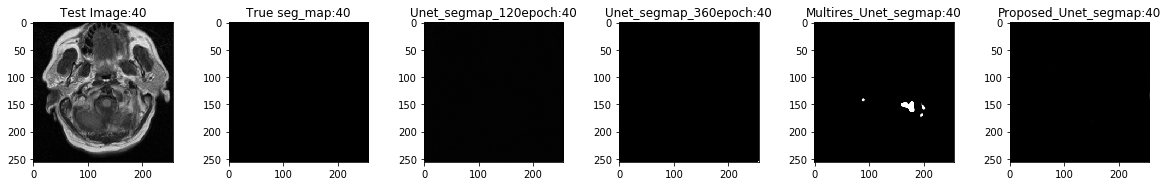

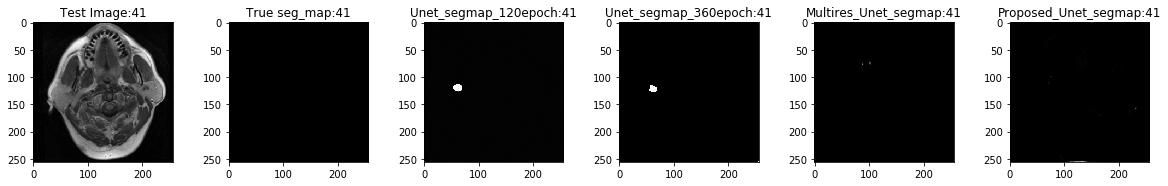

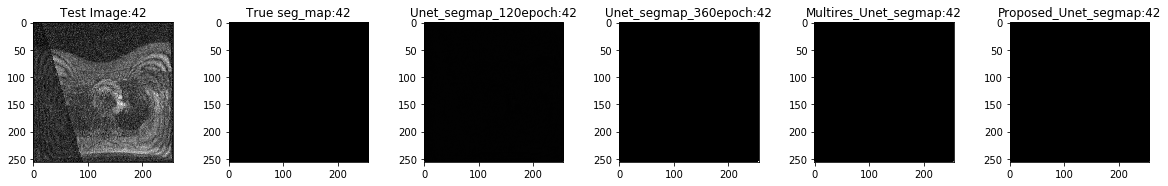

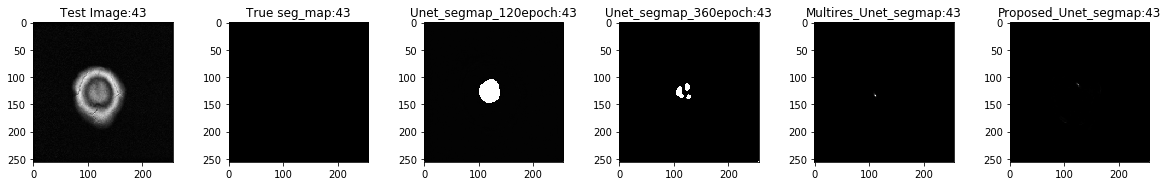

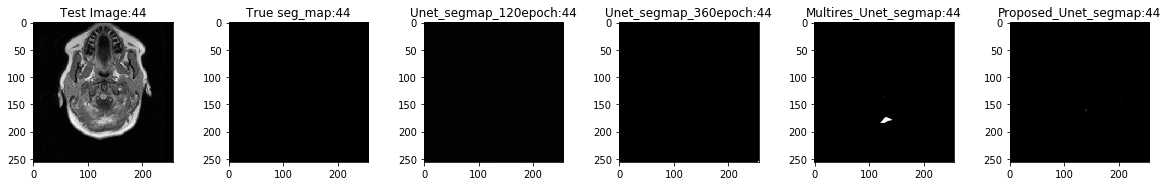

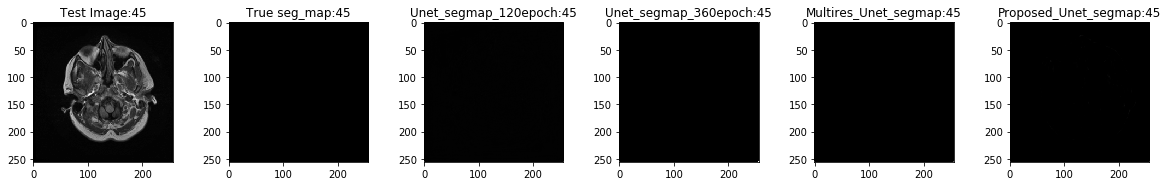

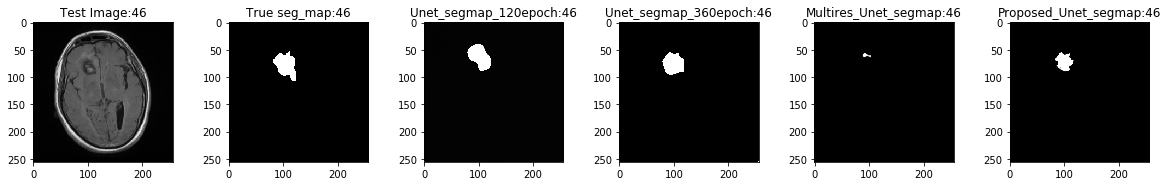

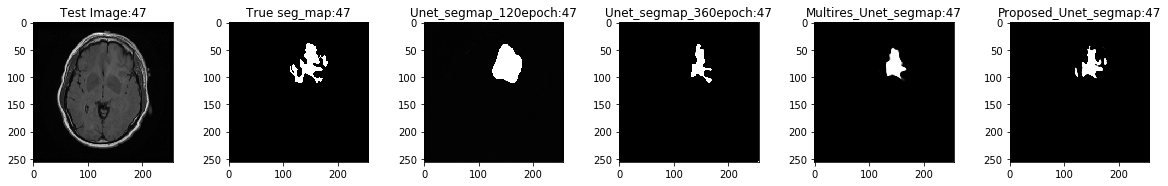

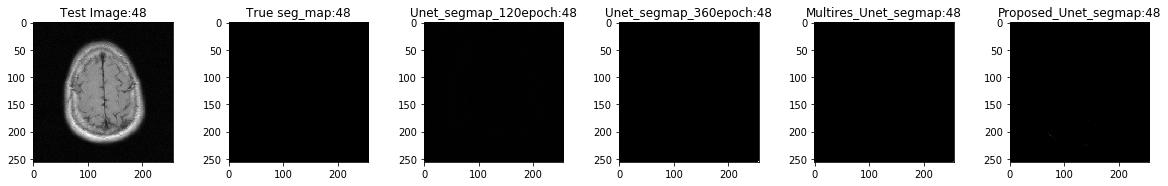

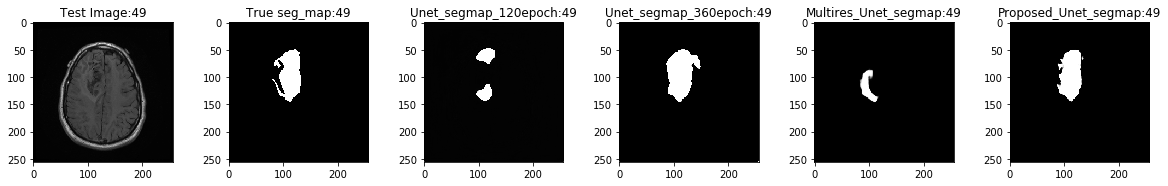

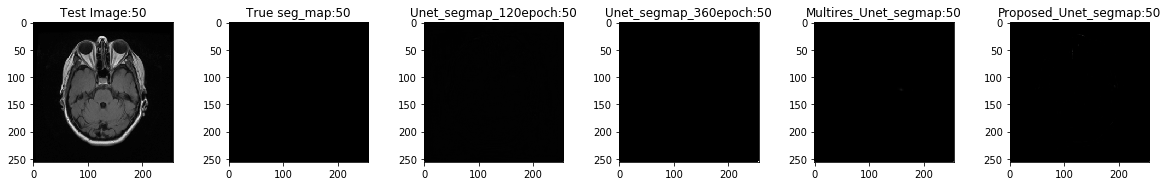

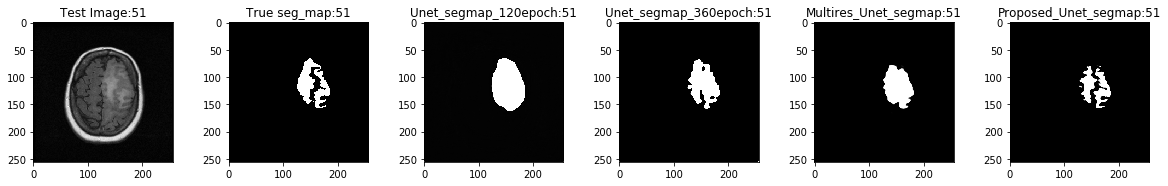

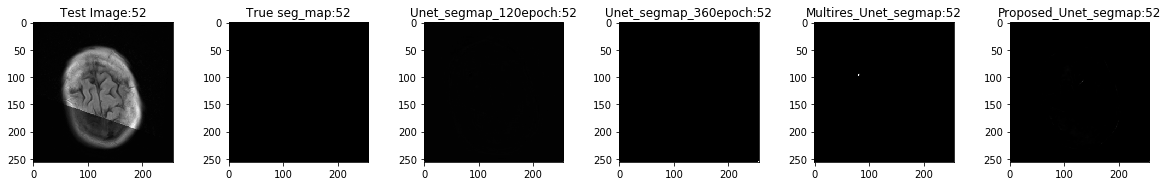

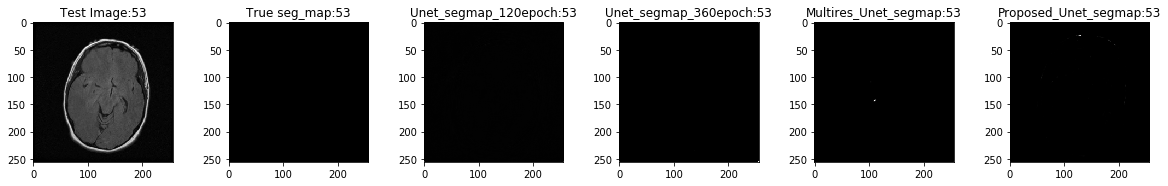

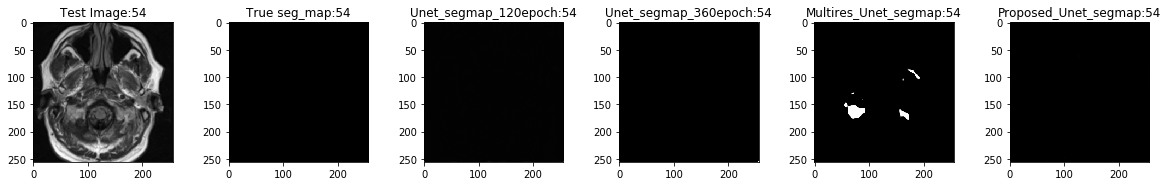

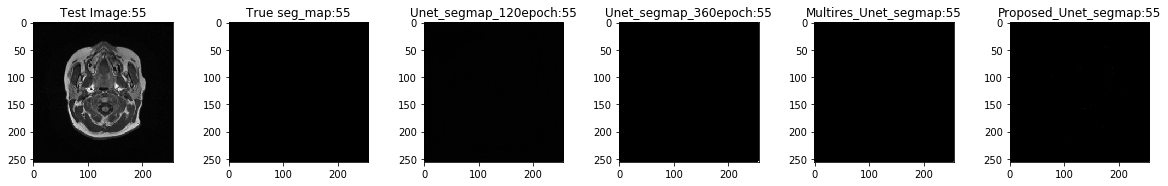

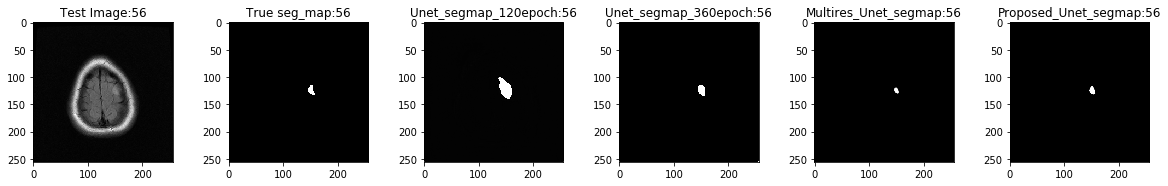

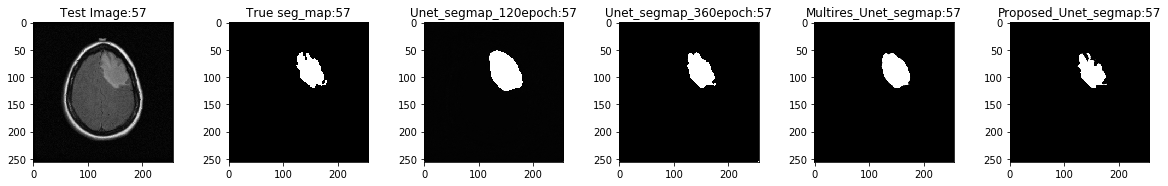

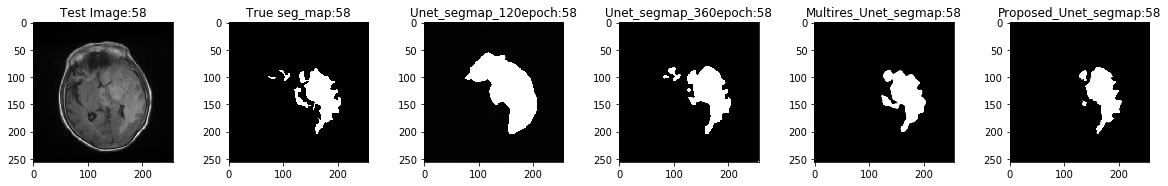

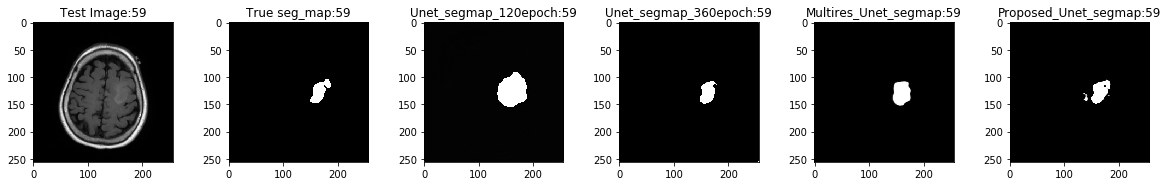

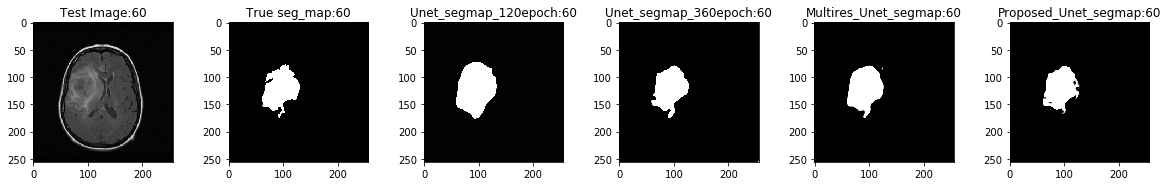

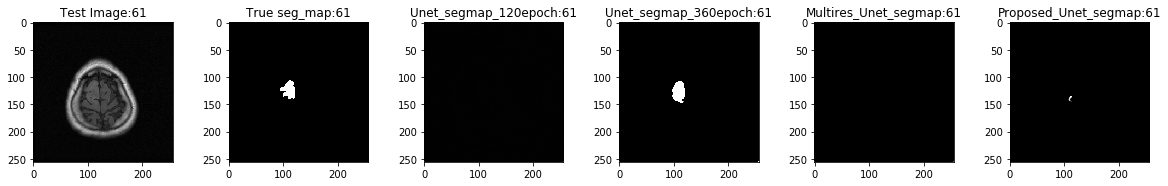

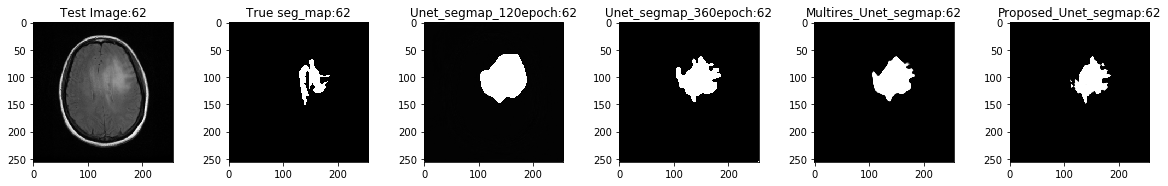

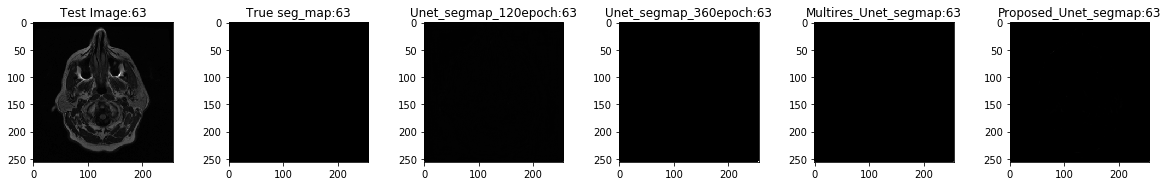

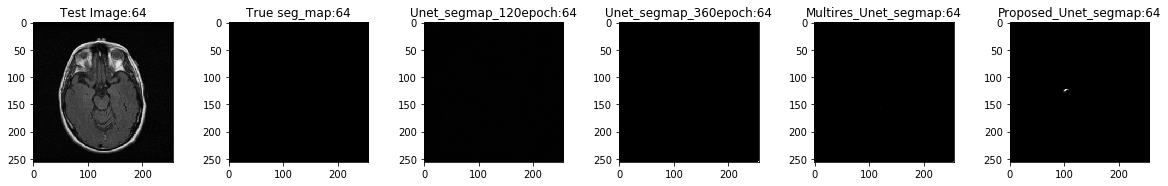

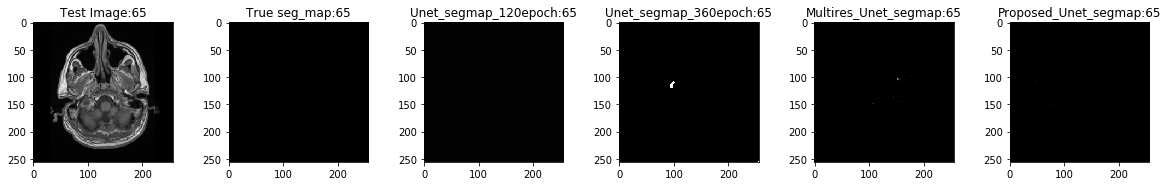

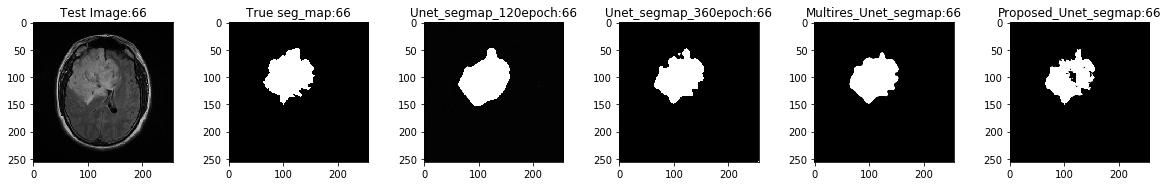

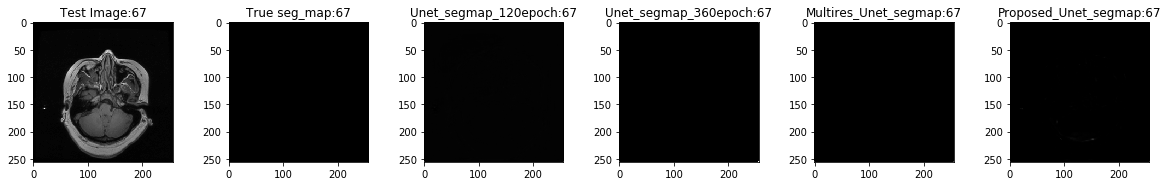

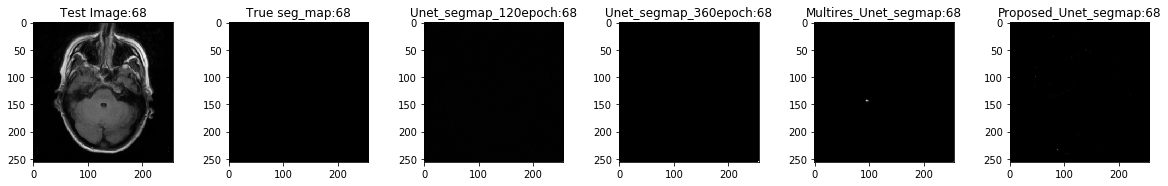

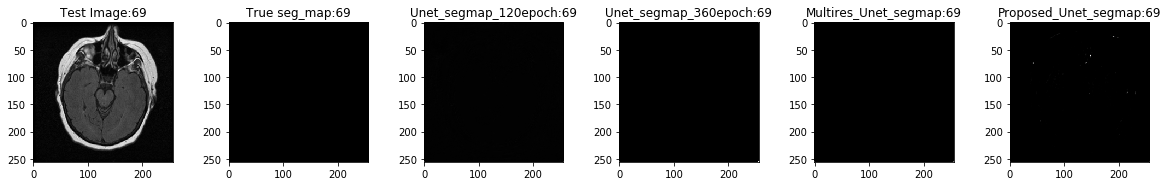

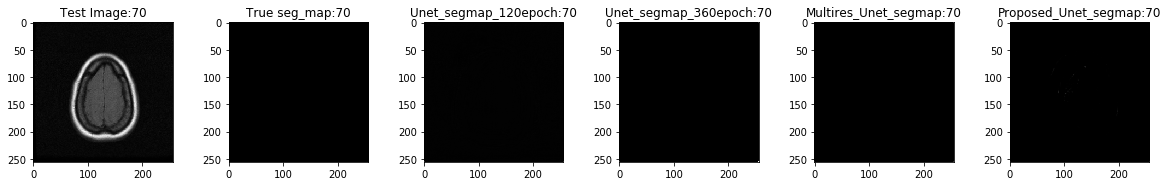

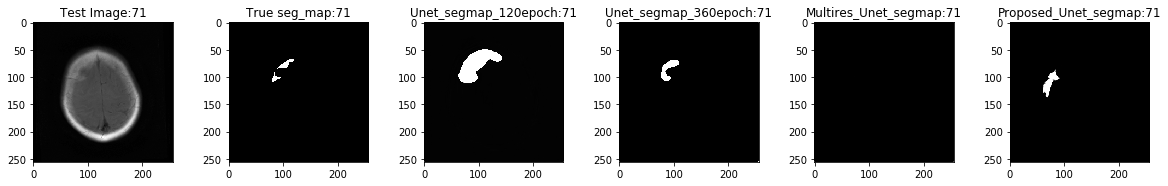

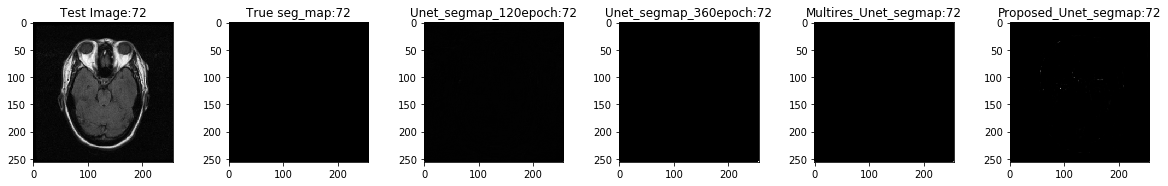

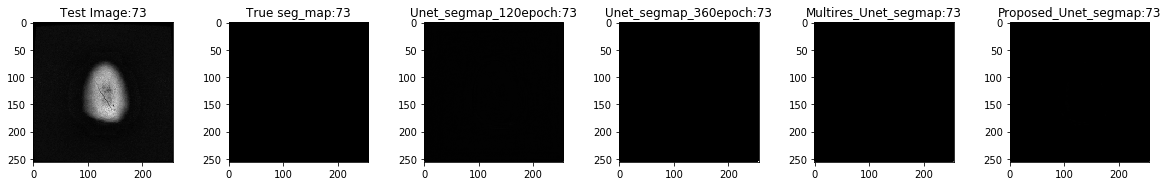

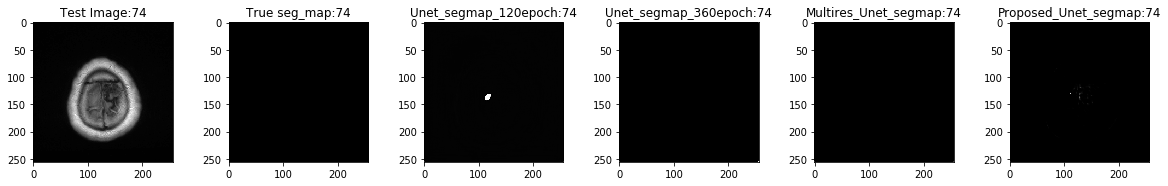

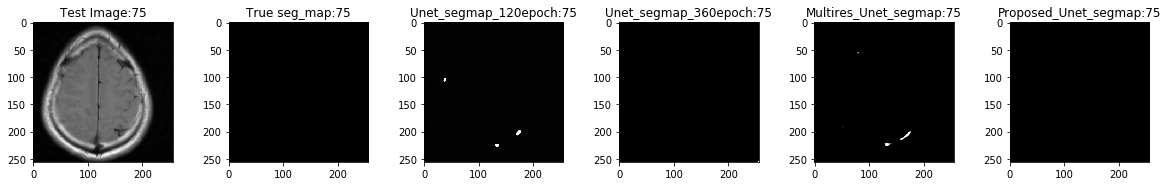

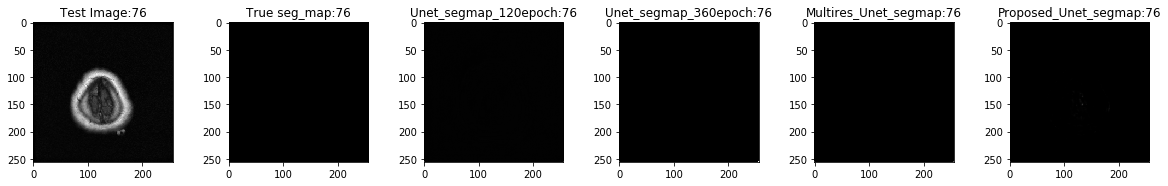

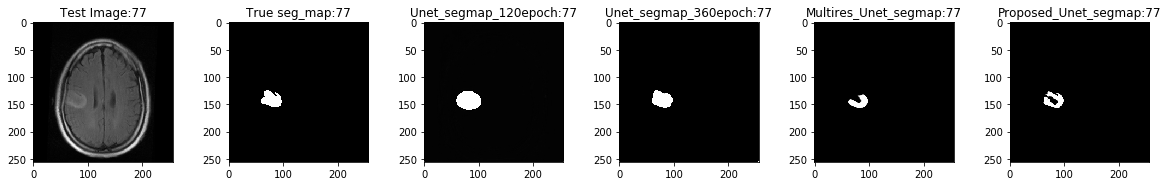

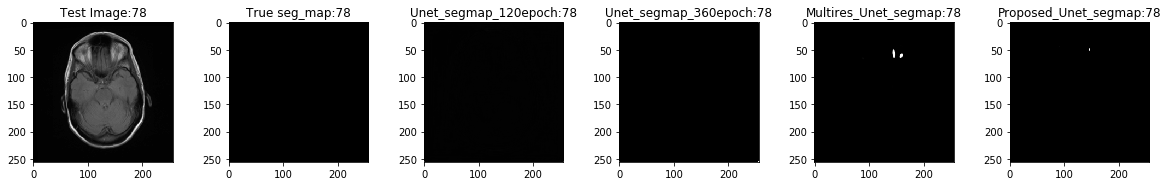

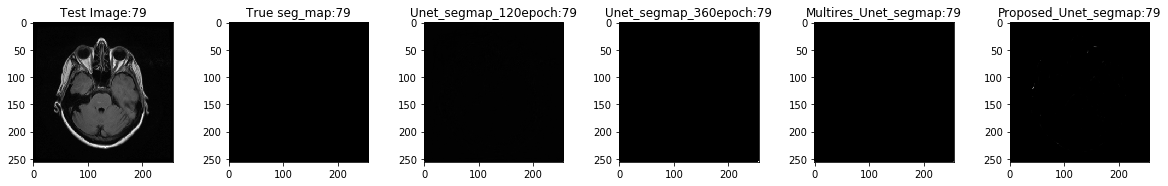

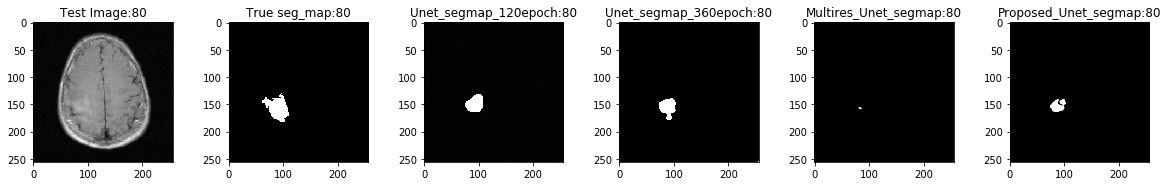

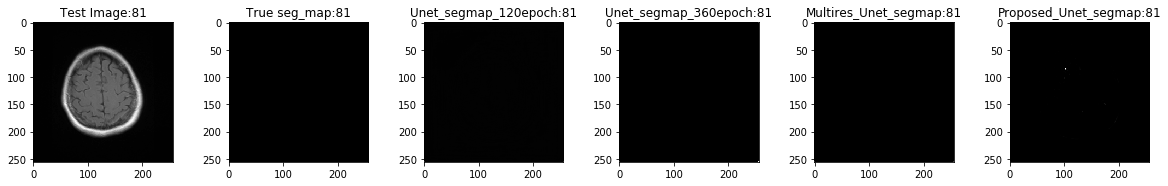

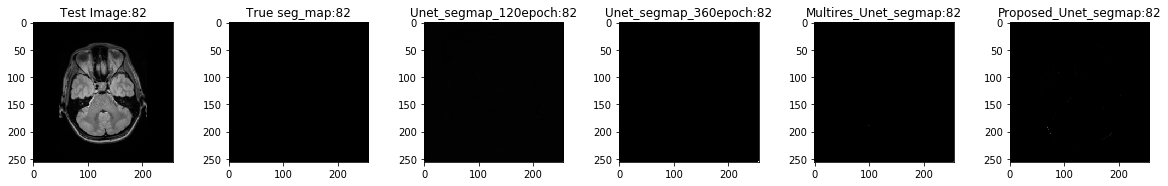

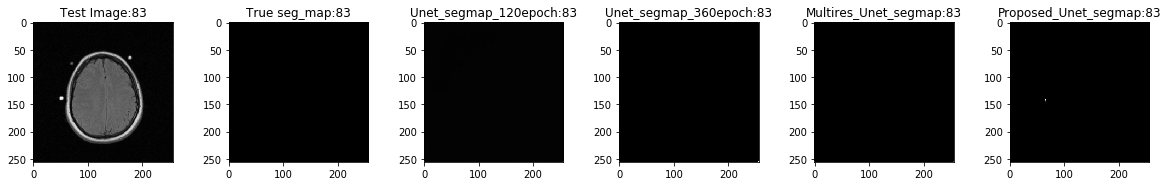

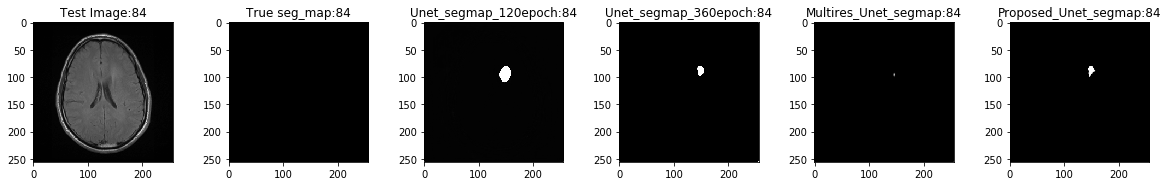

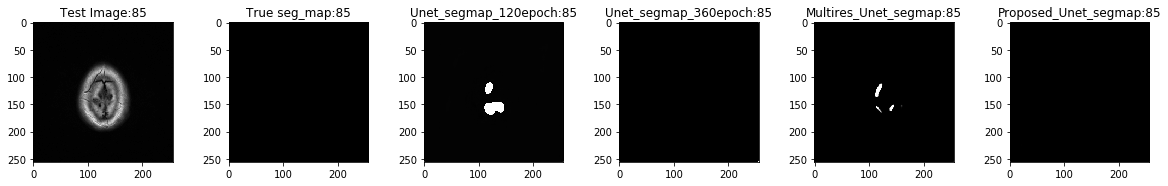

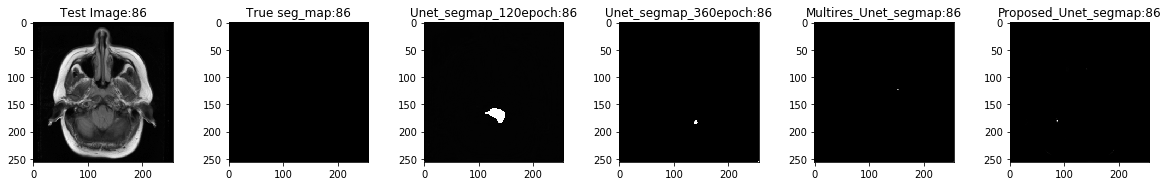

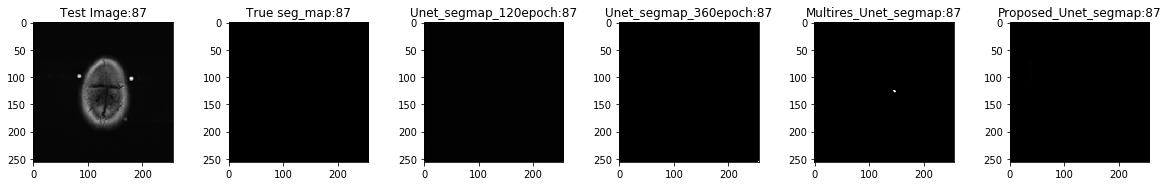

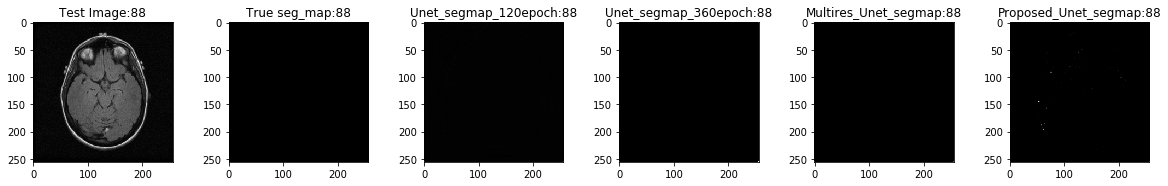

In [0]:

for i in range(len(pred_unet)):
  fig = plt.figure(figsize=(20,15))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  ax = fig.add_subplot(1,6,1)
  plt.title(f'Test Image:{i}')
  ax.imshow(np.reshape(Test_images[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,6,2)
  plt.title(f'True seg_map:{i}')
  ax.imshow(np.reshape(Test_masks[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,6,3)
  plt.title(f'Unet_segmap_120epoch:{i}')
  ax.imshow(np.reshape(pred_unet_120[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,6,4)
  plt.title(f'Unet_segmap_360epoch:{i}')
  ax.imshow(np.reshape(pred_unet[i]*255, (imagesize,imagesize)), cmap="gray")


  ax = fig.add_subplot(1,6,5)
  plt.title(f'Multires_Unet_segmap:{i}')
  ax.imshow(np.reshape(pred_multiresunet[i]*255, (imagesize,imagesize)), cmap="gray")


  ax = fig.add_subplot(1,6,6)
  plt.title(f'Proposed_Unet_segmap:{i}')
  ax.imshow(np.reshape(pred_proposedunet[i]*255, (imagesize,imagesize)), cmap="gray")

  #plt.savefig(f'outputs{i}')


# FUTURE DIRECTION


*   The Proposed model performed well on many examples and poorly on few instances.In future, we would like to address this issues where the model performed poorly and try to improve the performance by training the model with more diverse training examples.

